In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## READ DATASET

In [2]:
df = pd.read_csv("bread basket.csv")

In [3]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


## Apriori algoritm

In [4]:
from mlxtend.frequent_patterns import association_rules, apriori

In [5]:
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
transactions_str

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [6]:
# membuat matriks mxn dimana m=transaksi dan n=item dan setiap baris merepresentasikan apakah item tersebut 
# -ada dalam transaksi atau tidak
my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)


my_basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# membuat function return 0 dan 1
# 0 artinya bukan bagian transaksi, 1 artinya barang dalam transaksi itu

def encode(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# menerapkan fungsi pada dataset

my_basket_sets = my_basket.applymap(encode)
my_basket_sets.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# menggunakan 'algoritma apriori' dengan min_support=0.01 (1% dari 9465)
# Artinya item tersebut harus ada setidaknya dalam 94 transaksi dari 9465 transaksi hanya jika kami mempertimbangkan item tersebut di
# kumpulan item yang sering
frequent_items = apriori(my_basket_sets, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\nofia\AppData\Local\Programs\Python\Python39\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Toast, Coffee)"
57,0.014369,"(Sandwich, Tea)"
58,0.010037,"(Coffee, Bread, Cake)"
59,0.011199,"(Pastry, Coffee, Bread)"


In [9]:
# sekarang membuat aturan dari frequent itemset yang dihasilkan di atas

rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [13]:
# sekarang membuat aturan dari frequent itemset yang dihasilkan di atas

predict = association_rules(frequent_items, metric = "lift", min_threshold = 1)
predict.sort_values('confidence' , ascending = False, inplace = True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


In [14]:
predict.shape

(42, 10)

In [19]:
value = predict.loc[x,'']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 30 to 28
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         42 non-null     object 
 1   consequents         42 non-null     object 
 2   antecedent support  42 non-null     float64
 3   consequent support  42 non-null     float64
 4   support             42 non-null     float64
 5   confidence          42 non-null     float64
 6   lift                42 non-null     float64
 7   leverage            42 non-null     float64
 8   conviction          42 non-null     float64
 9   zhangs_metric       42 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.7+ KB


In [48]:
value = []
for x in predict.index:
    value.append(", ".join(predict.loc[x, 'antecedents']) + " - " + ", ".join(predict.loc[x, 'consequents']))
print("finish")

finish


In [49]:
valueY = predict['confidence']

In [50]:
value

['Toast - Coffee',
 'Spanish Brunch - Coffee',
 'Medialuna - Coffee',
 'Pastry - Coffee',
 'Alfajores - Coffee',
 'Juice - Coffee',
 'Sandwich - Coffee',
 'Cake - Coffee',
 'Scone - Coffee',
 'Cookies - Coffee',
 'Hot chocolate - Coffee',
 'Brownie - Coffee',
 'Muffin - Coffee',
 'Pastry - Bread',
 'Cake - Tea',
 'Coffee, Tea - Cake',
 'Sandwich - Tea',
 'Hot chocolate - Cake',
 'Coffee, Cake - Tea',
 'Tea - Cake',
 'Pastry - Coffee, Bread',
 'Coffee, Bread - Pastry',
 'Coffee - Cake',
 'Coffee, Bread - Cake',
 'Cake - Hot chocolate',
 'Tea - Sandwich',
 'Coffee - Pastry',
 'Cake - Coffee, Bread',
 'Cake - Coffee, Tea',
 'Bread - Pastry',
 'Coffee - Sandwich',
 'Coffee - Medialuna',
 'Tea - Coffee, Cake',
 'Coffee - Hot chocolate',
 'Coffee - Cookies',
 'Coffee - Toast',
 'Coffee - Juice',
 'Coffee - Brownie',
 'Coffee - Alfajores',
 'Coffee - Muffin',
 'Coffee - Scone',
 'Coffee - Spanish Brunch']

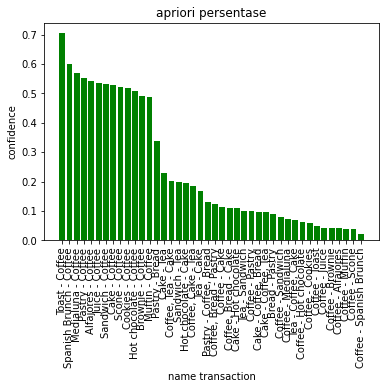

In [61]:
# create bar chart
fig, ax = plt.subplots()
ax.bar(value, valueY, color='green')

# set labels
ax.set_xlabel('name transaction')
ax.set_ylabel('confidence')
ax.set_title('apriori persentase')
ax.tick_params(axis='x', labelrotation=90)
plt.show()

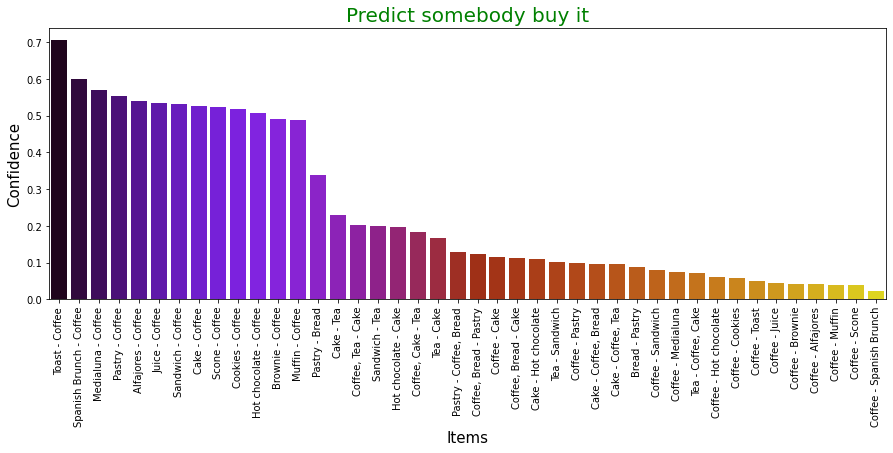

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(x = value, y = valueY, palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Confidence', size = 15)
plt.title('Predict somebody buy it', color = 'green', size = 20)
plt.show()

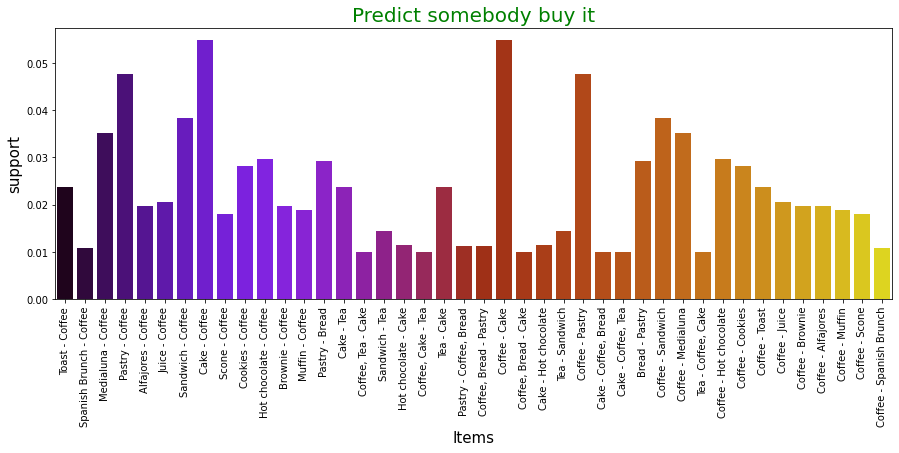

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(x = value, y = predict['support'], palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90)
plt.ylabel('support', size = 15)
plt.title('Predict somebody buy it', color = 'green', size = 20)
plt.show()

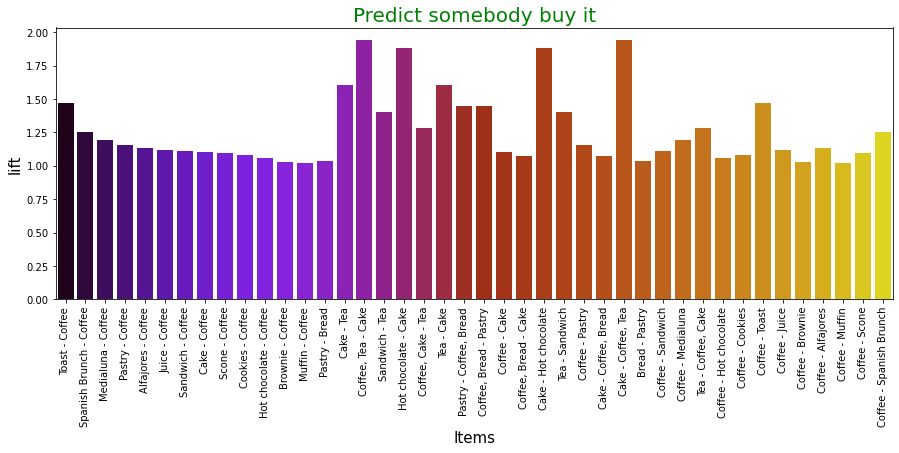

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x = value, y = predict['lift'], palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=90)
plt.ylabel('lift', size = 15)
plt.title('Predict somebody buy it', color = 'green', size = 20)
plt.show()